## Tâm lý học về sự cầu tiến

Lĩnh vực tâm lý học thực chứng nghiên cứu những hành vi nào của con người sẽ dẫn đến một cuộc sống tuyệt vời. Bạn có thể tưởng tượng lĩnh vực này như điểm giao thoa của sách tự lực và lý thuyết thống kê chính xác. Một trong những phát hiện nổi tiếng của tâm lý học tích cực là **Tư Duy Cầu Tiến**. Mỗi người có thể có một tư duy bảo thủ hoặc tư duy cầu tiến. Nếu bạn có tư duy bảo thủ, bạn tin rằng các khả năng của một người đã được định sẵn kể từ lúc mới sinh ra hoặc ngay từ thời thơ ấu. Như vậy, tài năng của một người là cố định và không thể thay đổi trong suốt cuộc đời. Nếu bạn đã không có được nó ngay lúc này, bạn vĩnh viễn không thể có được nó. Mặt khác, nếu bạn có một tư duy cầu tiến, bạn tin rằng tài năng có thể được phát triển. Hệ quả trực tiếp của việc này là bạn sẽ không coi sự thất bại như một dạng thiếu năng lực, mà bạn coi nó như là một phần của quá trình học hỏi.

Chúng ta sẽ không đi vào việc tranh luận tư duy nào trong hai tư duy này là đúng (có lẽ nó nằm đâu đó ở giữa). Việc này không cần thiết cho mục đích của chúng ta. Quan trọng là các nhà tâm lý học đã phát hiện ra những người có tư duy cầu tiến có khả năng thành công cao hơn. Họ có nhiều khả năng đạt được những điều họ đã vạch ra.

Như đã làm với suy luận nhân quả, chúng ta đã học được cách nhìn những lời khẳng định này với sự thận trọng. Có phải do tư duy cầu tiến khiến cho con người thành công hơn? Hay đơn giản chỉ là trường hợp những người thành công hơn thì có xu hướng phát triển tư duy cầu tiến như là kết quả cho sự thành công của họ? Chú ý tới kết quả tiềm năng, chúng ta có lý do để tin rằng thiên lệch xuất hiện trong những lời khẳng định này. \\(Y_0|T=1\\) có thể lớn hơn \\(Y_0|T=0\\), nghĩa là những người có tư duy cầu tiến sẽ thành công hơn ngay cả khi họ có tư duy bảo thủ.

Để làm rõ vấn đề này, các nhà nghiên cứu đã thiết kế [Nghiên cứu quốc gia về tư duy học tập](https://mindsetscholarsnetwork.org/about-the-network/current-initatives/national-mindset-study/#). Đây là một nghiên cứu ngẫu nhiên được thực hiện ở các trường trung học công lập của Mỹ với mục đích tìm kiếm tác động của tư duy cầu tiến. Các thức hoạt động của nghiên cứu này như sau. Học sinh tham gia hội thảo của trường để hình thành tư duy cầu tiến cho bản thân. Sau đó, các nhà nghiên cứu theo dõi các sinh viên này trong những năm đại học để đo lường thành tích học tập của họ. Phép đo này được tổng hợp thành điểm thành tích và được chuẩn hoá. Dữ liệu gốc của nghiên cứu này không được công bố rộng rãi để đảm bảo quyền riêng tư của các sinh viên. Tuy nhiên, chúng ta có một bộ dữ liệu mô phỏng với các thuộc tính thống kê tương tự được cung cấp bởi [Athey and Wager](https://arxiv.org/pdf/1902.07409.pdf), vì vậy chúng ta sẽ tận dụng nó.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import graphviz as gr

%matplotlib inline

style.use("fivethirtyeight")
pd.set_option("display.max_columns", 6)

Bên cạnh biến được can thiệp và kết quả, nghiên cứu cũng ghi lại một số thuộc tính khác:

* schoolid: định danh trường của học sinh;
* success_expect:  sự tự kỳ vọng vào thành công trong tương lai, một biến đại diện cho những thành tích trước đó, được đo lường trước khi chỉ định ngẫu nhiên;
* ethnicity: biến phân loại cho chủng tộc/sắc tộc của học sinh;
* gender: biến phân loại cho nhận biết giới tính của học sinh;
* frst_in_family: biến phân loại cho học vấn của thế hệ đầu tiên, ví dụ, người đầu tiên trong gia đình vào đại học;
* school_urbanicity: biến phân loại cấp trường cho tính đô thị của trường, ví dụ, nông thôn, ngoại ô, v.v;
* school_mindset: giá trị trung bình cấp trường cho giá trị trung bình của học sinh có tư duy bảo thủ, được ghi lại trước chỉ định ngẫu nhiên, được chuẩn hoá;
* school_achievement: thành tích cấp trường, được đo lường bởi điểm thi và sự chuẩn bị đại học cho 4 khoá học sinh trước đó, được chuẩn hoá; 
* school_ethnic_minority: thành phần chủng tộc/dân tộc thiểu số, ví dụ, tỷ lệ phần trăm học sinh là người da màu, người La-tin, người Mỹ bản địa, được chuẩn hoá;
* school_poverty: tỷ lệ nghèo ở trường, ví dụ, tỷ lệ phần trăm học sinh tới từ những gia đình có thu nhập dưới chuẩn nghèo liên bang, được chuẩn hoá;
* school_size: tổng số học sinh trong bốn cấp học ở trường, được chuẩn hoá.

In [3]:
data = pd.read_csv("./data/learning_mindset.csv")
data.sample(5, random_state=5)

,schoolid,intervention,achievement_score,...,school_ethnic_minority,school_poverty,school_size
259,73,1,1.480828,...,-0.515202,-0.169849,0.173954
3435,76,0,-0.987277,...,-1.310927,0.224077,-0.426757
9963,4,0,-0.152340,...,0.875012,-0.724801,0.761781
4488,67,0,0.358336,...,0.315755,0.054586,1.862187
2637,16,1,1.360920,...,-0.033161,-0.982274,1.591641


Mặc dù nghiên cứu được thực hiện ngẫu nhiên, nhưng có vẻ như dữ liệu này không hoàn toàn loại bỏ được nhiễu. Nếu chúng ta nhìn vào những thuộc tính bổ sung, chúng ta sẽ nhận thấy chúng khác nhau một cách có hệ thống giữa nhóm được can thiệp và nhóm đối chứng. Một trong những nguyên nhân có thể là biến can thiệp được đo lường bởi những học sinh tham gia hội thảo. Vì vậy, mặc dù cơ hội để tham gia là ngẫu nhiên, bản thân việc tham gia lại không phải như vậy. Ở đây chúng ta gặp phải trường hợp không tuân thủ. Một minh chứng cho điều này là kỳ vọng về thành công của học sinh có tương quan như thế nào với việc tham gia hội thảo. Học sinh tự kỳ vọng thành công cao hơn có nhiều khả năng đã tham gia hội thảo tư duy cầu tiến hơn. 

In [4]:
data.groupby("success_expect")["intervention"].mean()

success_expect
1    0.271739
2    0.265957
3    0.294118
4    0.271617
5    0.311070
6    0.354287
7    0.362319
Name: intervention, dtype: float64

Tuy nhiên, hãy xem xét sự khác biệt của các giá trị trung bình \\(E[Y|T=1] - E[Y|T=0]\\) trông như thế nào. Điều này sẽ là cơ sở hữu ích để thực hiện so sánh.

In [5]:
smf.ols("achievement_score ~ intervention", data=data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.1538,0.012,-13.201,0.000,-0.177,-0.131
intervention,0.4723,0.020,23.133,0.000,0.432,0.512


Chỉ cần so sánh những người có và không có can thiệp, chúng ta có thể thấy nhóm can thiệp có điểm thành tích trung bình là 0.3185 (0.4723 - 0.1538), cao hơn nhóm đối chứng. Liệu con số này lớn hay nhỏ đây? Chúng ta biết rằng việc diễn giải các kết quả đã được chuẩn hoá không dễ dàng chút nào, nhưng hãy kiên nhẫn trong giây lát. Chúng tôi cho rằng điều này đáng để xem xét kỹ lưỡng bởi chúng ta sẽ còn gặp phải điểm số được chuẩn hoá trong tương lai.

Biến kết quả được chuẩn hoá nghĩa là nó được đo lường theo độ lệch chuẩn. Vì vâỵ, nhóm can thiệp trên 0.3185 lần độ lệch chuẩn so với nhóm đối chứng. Đó là ý nghĩa của nó. Đối với việc liệu con số này là nhỏ hay lớn, hãy nhớ lại một vài kiến thức về phân phối chuẩn. Chúng ta biết 95% quan sát trong khoảng 2 lần độ lệch chuẩn, còn lại 2.5% ở mỗi đuôi trái và đuôi phải. Điều này cũng có nghĩa nếu ai đó cao hơn giá trị trung bình 2 lần độ lệch chuẩn, 97.5% (95% cộng thêm 2.5% đuôi trái) những người khác thấp hơn người đó. Bằng cách nhìn vào CDF, chúng ta cũng thấy rằng khoảng 85% quan sát dưới 1 lần độ lệch chuẩn và 70% quan sát dưới 0.5 lần độ lệch chuẩn. Do vậy, điều này có nghĩa trung bình nhóm can thiệp cao hơn 70% thành tích cá nhân. Mặt khác, giá trị trung bình của nhóm đối chứng chỉ cao hơn 44% thành tích cá nhân.

Điều này có thể được biểu diễn như sau.

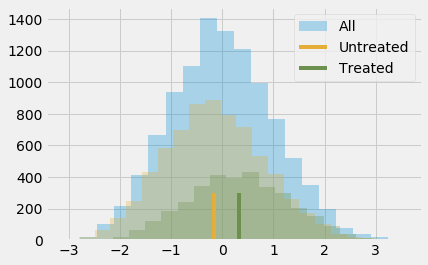

In [6]:
plt.hist(data["achievement_score"], bins=20, alpha=0.3, label="Tất cả")
plt.hist(data.query("intervention==0")["achievement_score"], bins=20, alpha=0.3, color="C2")
plt.hist(data.query("intervention==1")["achievement_score"], bins=20, alpha=0.3, color="C3")
plt.vlines(-0.1538, 0, 300, label="Nhóm đối chứng", color="C2")
plt.vlines(-0.1538+0.4723, 0, 300, label="Nhóm can thiệp", color="C3")
plt.legend();

Tất nhiên, chúng ta vẫn cho rằng kết qủa này chệch. Sự khác biệt giữa nhóm can thiệp và nhóm đối chứng có thể còn nhỏ hơn mức này, bởi chúng ta cho rằng thiên lệch dương. Chúng ta đã thấy rằng những người tham vọng hơn thì sẵn sàng tham gia hội thảo hơn, vì vậy có lẽ họ còn thành công hơn nếu họ thật sự tham gia hội thảo. Để kiểm soát thiên lệch này, chúng ta có thể sử dụng phương pháp hồi quy hoặc ghép cặp, nhưng đã đến lúc để học một phương pháp mới.

## Điểm Xu Hướng

Điểm xu hướng xuất phát từ việc nhận ra rằng bạn không nhất thiết phảỉ trực tiếp kiểm soát biến nhiễu X để thu được độc lập có điều kiện \\((Y_1, Y_0) \perp T | X\\). Thay vào đó, chỉ cần kiểm soát điểm cân bằng \\(E[T|X]\\) là đủ. Điểm cân bằng này thường là xác suất có điều kiện cuả can thiệp, \\(P(T|X)\\), còn được gọi là điểm xu hướng \\(P(x)\\). Điểm xu hướng giúp bạn không cần phải cố định toàn bộ X để thu được độc lập cho kết quả tiềm năng của can thiệp. Chỉ cần cố định một biến điểm xu hướng là đủ:

$
(Y_1, Y_0) \perp T | P(x)
$

Có một cách chứng minh bằng toán học cho lý do tại sao lại như vậy, nhưng chúng ta có thể tạm thời bỏ qua nó và tiếp cận vấn đề bằng trực giác. Điểm xu hướng là xác suất có điều kiện của việc nhận can thiệp. Vì vậy chúng ta có thể nghĩ về nó như một loại hàm mà biến đổi X thành can thiệp T. Điểm xu hướng tạo nên điểm trung gian giữa biến X và can thiệp T. Chúng ta biểu diễn chúng qua biểu đồ nhân quả như sau. 

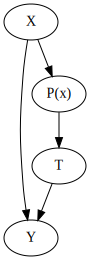

In [7]:
g = gr.Digraph()
g.edge("T", "Y")
g.edge("X", "Y")
g.edge("X", "P(x)")
g.edge("P(x)", "T")
g

Nếu ta đã biết P(x), một mình biến X sẽ không giúp ta biết thêm gì hơn về T. Điều này có nghĩa là việc kiểm soát P(x) giống như trực tiếp kiểm soát X. Chúng ta có thể nghĩ về nó qua ví dụ về tư duy. Nhóm can thiệp và nhóm đối chứng ban đầu không tương đồng với nhau bởi những người tham vọng hơn có nhiều khả năng nhận can thiệp và thành công hơn trong cuộc sống. Tuy nhiên, nếu chúng ta chọn ra 2 cá nhân, một từ nhóm can thiệp và một từ nhóm đối chứng, với xác suất nhận can thiệp là như nhau, hai cá nhân này sẽ tương đồng. Hãy nghĩ về điều này. Nếu họ có cùng xác suất nhận can thiệp, lý do duy nhất mà một trong số 2 người nhận được và người còn lại không nhận được không đơn thuần là ngẫu nhiên. Giữ điểm xu hướng không đổi theo cách làm cho dữ liệu như thể được chỉ định ngẫu nhiên.

Giờ chúng ta đã nắm được cách giải thích trực quan, hãy nhìn vào cách chứng minh toán học. Chúng ta muốn chứng minh \\((Y_1, Y_0) \perp T | P(x)\\) tương đương với việc khẳng định rằng

$
E[T|P(x), X] = E[T|P(x)] 
$

Điều này chỉ đơn thuần cho biết khi chúng ta cố định P(x), X không cung cấp thêm bất cứ thông tin gì về T. Cách chứng minh này có thể hơi lạ. Chúng tôi sẽ chứng minh phương trình trên đúng bằng cách biến đổi nó thành một phương trình đơn giản hơn. Đầu tiên hãy xem xét vế trái \\(E[T|P(x), X]\\).

$
E[T|P(x), X] = E[T|X] = P(x)
$

Chúng ta dựa vào sự thật rằng P(x) thực chất chỉ là hàm của X, vì vậy cố định P(x) không cung cấp thêm bất cứ thông tin nào sau khi chúng ta cố định X. Sau đó, chúng ta sử dụng định nghĩa về điểm xu hướng \\(E[T|X]\\). Đối với vế phải, chúng ta sẽ sử dụng Luật kỳ vọng lặp \\(E[A] = E[E[A|B]]\\). Định luật này cho biết chúng ta có thể tính toán giá trị kỳ vọng của A bằng cách xem xét giá trị của A theo B và sau đó lấy giá trị trung bình.

$
E[T|P(x)] = E[E[T|P(x),X]|P(x)] = E[P(x)|P(x)] = P(x)
$

Dấu bằng đầu tiên bắt nguồn từ Luật kỳ vọng lặp. Dấu bằng thứ hai là điều chúng ta tìm ra khi xử lý vế trái. Bởi cả vế trái và vế phải bằng nhau, cùng bằng P(x), ta có điều phải chứng minh. 

## Điểm Xu Hướng Theo Trọng Số 

![img](./data/img/ps/balance.png)

OK, vậy giờ chúng ta đã có điểm xu hướng. Tiếp theo sẽ là gì? Như đã nói, tất cả những gì chúng ta cần làm là cố định nó. Ví dụ, chúng ta có thể chạy một hồi quy tuyến tính chỉ cố định điểm xu hướng, thay vì tất cả Xs. Bây giờ, hãy xem xét một kỹ thuật mà chỉ sử dụng một mình điểm xu hướng. Ý tưởng là biểu diễn khác biệt có điều kiện của giá trị trung bình thông qua điểm xu hướng

$
E[Y|X,T=1]−E[Y|X,T=0] = E\bigg[\dfrac{Y}{P(x)}|X,T=1\bigg]P(x) - E\bigg[\dfrac{Y}{(1-P(x))}|X,T=0\bigg](1-P(x))
$

Chúng ta có thể giản lược phương trình này hơn nữa, nhưng trước hết hãy xem xét nó dưới dạng này này bởi nó giúp chúng ta có cách nhìn trực quan về những gì điểm xu hướng đang thực hiện. Phần tử đầu tiên ước lượng \\(Y_1\\). Nó gộp tất cả những trường hợp được can thiệp và nhân chúng với nghịch đảo của xác suất can thiệp. Bằng cách này ta gán cho những người có xác suất can thiệp thấp trọng số cao. Điều này nghe có vẻ hợp lý đấy chứ? Nếu một người có xác suất can thiệp thấp, người đó sẽ giống như người trong nhóm đối chứng. Tuy nhiên, cá nhân đó đã được can thiệp. Điều này hẳn là thú vị. Chúng ta gặp những đối tượng can thiệp trông như thể đối chứng, vì vậy chúng ta gán cho cá thể đó trọng số cao. Việc này giúp tạo ra một tổng thể có kích thước giống như ban đầu, nhưng tất cả mọi người đều được nhận can thiệp. Với cách diễn giải tương tự, phần tử còn lại xem xét nhóm đối chứng và đặt trọng số cao cho những cá nhân giống như được can thiệp. Mô hình ước lượng này được gọi là Inverse Probability of Treatment Weighting, vì nó chia mỗi kết quả của đối tượng cho xác suất nhận can thiệp ngược với điều mà nó nhận được.

Hình sau biểu diễn những điều mô hình ước lượng này thực hiện.

![img](./data/img/ps/iptw.png)

Biều đồ phía trên bên trái biểu diễn dữ liệu gốc. Các chấm màu xanh biểu diễn nhóm đối chứng và các chấm đỏ biểu diễn nhóm can thiệp. Biểu đồ dưới cùng biểu diễn điểm xu hướng P(x). Lưu ý rằng nó nằm giữa 0 và 1, nó tăng khi X tăng. Cuối cùng, biểu đồ phía trên bên phải là dữ liệu sau khi được đặt trọng số. Chú ý chấm đỏ (được can thiệp) nằm ở phía bên trái (điểm xu hướng thấp hơn) có trọng số cao hơn. Tương tự, chấm xanh nằm về phía bên phải cũng có trọng số cao hơn. 

Sau khi chúng ta đã có cái nhìn trực quan, chúng ta có thể giản lược những phần tử ở trên

$
E\bigg[Y \dfrac{T-P(x)}{P(x)(1-P(x))}\bigg|X\bigg]
$

mà nếu chúng ta tích hợp với X sẽ trở thành mô hình ước lượng điểm xu hướng theo trọng số. 
$
E\bigg[Y \dfrac{T-P(x)}{P(x)(1-P(x))}\bigg]
$

Lưu ý rằng mô hình ước lượng này yêu cầu \\(P(x)\\) hoặc \\(1-P(x)\\) phải dương. Nói cách khác, điều này có nghĩa là mọi người cần có ít nhất một cơ hội nào đó để nhận can thiệp hoặc không nhận can thiệp. Một cách nói khác là phân phối của nhóm can thiệp và nhóm đối chứng có chồng lấn. Đây là **giả thiết điều kiện dương** của suy luận nhân quả. Nó cũng có ý nghĩa về mặt trực quan. Nếu nhóm can thiệp và nhóm đối chứng không chồng lấn, có nghĩa là chúng rất khác nhau và chúng ta không thể ngoại suy tác động của một nhóm lên nhóm còn lại. Phép ngoại suy này không phải là không thể thực hiên được (hồi quy có thể), nhưng nó vô cùng nguy hại. Nó giống như việc thử nghiệm một loại thuốc mới trong một thí nghiệm mà chỉ có đàn ông mới nhận can thiệp và sau đó giả định rằng phụ nữ sẽ có phản ứng tương tự.  

## Ước lượng Điểm Xu Hướng

Trong một thế giới lý tưởng, chúng ta sẽ có điểm xu hướng thực \\(P(x)\\). Tuy nhiên, trên thực tế, chúng ta chưa biết cơ chế chỉ định can thiệp và chúng ta cần thay thế điểm xu hướng thực bằng một ước lượng của nó \\(\hat{P}(x)\\). Một cách thông dụng để thực hiện điều này là sử dụng hồi quy lô-gít nhưng các phương pháp học máy khác, như gradient boosting, cũng có thể được sử dụng (mặc dù nó yêu cầu một vài bước bổ sung để tránh tình trạng quá khớp).

Ở đây, tôi sẽ sử dụng hồi quy lô-gít. Điều này có nghĩa là tôi sẽ phải biến đổi các biến phân loại trong tập dữ liệu thành các biến giả.

In [8]:
categ = ["ethnicity", "gender", "school_urbanicity"]
cont = ["school_mindset", "school_achievement", "school_ethnic_minority", "school_poverty", "school_size"]

data_with_categ = pd.concat([
    data.drop(columns=categ), # dataset without the categorical features
    pd.get_dummies(data[categ], columns=categ, drop_first=False)# dataset without categorical converted to dummies
], axis=1)

print(data_with_categ.shape)

(10391, 32)


Bây giờ, hãy sử dụng hồi quy lô-gít để ước lượng điểm xu hướng.

In [9]:
from sklearn.linear_model import LogisticRegression

T = 'intervention'
Y = 'achievement_score'
X = data_with_categ.columns.drop(['schoolid', T, Y])

ps_model = LogisticRegression(C=1e6).fit(data_with_categ[X], data_with_categ[T])

data_ps = data.assign(propensity_score=ps_model.predict_proba(data_with_categ[X])[:, 1])

data_ps[["intervention", "achievement_score", "propensity_score"]].head()

,intervention,achievement_score,propensity_score
0,1,0.277359,0.315532
1,1,-0.449646,0.263685
2,1,0.769703,0.344070
3,1,-0.121763,0.344070
4,1,1.526147,0.367853


Đầu tiên, chúng ta có thể chắc rằng trọng số điểm xu hướng thực sự tái cấu trúc tổng thể như thể mọi người đều nhận can thiệp như nhau. Bằng cách đặt trọng số \\(1/P(x)\\), nó tạo ra tổng thể mà mọi người đều được nhận can thiệp và bằng cách đặt trọng số \\(1/(1-P(x))\\), nó tạo ra tổng thể mà mọi người không nhận can thiệp. 

In [ ]:
weight_t = 1/data_ps.query("intervention==1")["propensity_score"]
weight_nt = 1/(1-data_ps.query("intervention==0")["propensity_score"])
print("Kích Thước Mẫu ban đầu", data.shape[0])
print("Kích Thước Mẫu của Tổng thể được được can thiệp", sum(weight_t))
print("Kích Thước Mẫu của Tổng thể đối chứng", sum(weight_nt))

Chúng ta cũng có thể sử dụng điểm xu hướng để tìm bằng chứng của nhiễu. Nếu một phân đoạn của tổng thể có  điểm xu hướng cao hơn một phân đoạn khác, điều này có nghĩa là một điều gì đó không ngẫu nhiên đang gây ra can thiệp. Nếu điều tương tự cũng gây ra kết quả, chúng ta có nhiễu. Trong trường hợp của chúng ta, chúng ta có thể thấy rằng những sinh viên có tham vọng lớn hơn cũng có xác suất tham dự hội thảo về tư duy cầu tiến cao hơn.

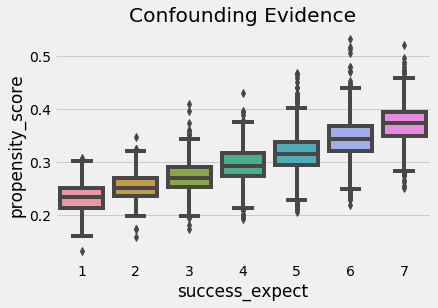

In [11]:
sns.boxplot(x="success_expect", y="propensity_score", data=data_ps)
plt.title("Confounding Evidence");

Chúng tôi cũng phải kiểm tra xem có sự chồng lấn giữa tổng thể được can thiệp và đối chứng hay không. Để làm được như vậy, chúng ta có thể thấy phân phối@ thực nghiệm của điểm xu hướng trên nhóm can thiệp và nhóm đối chứng. Nhìn vào biểu đồ dưới đây, chúng ta có thể thấy rằng không ai có điểm xu hướng bằng 0 và ngay cả ở những vùng thấp hơn của điểm xu hướng, chúng ta có thể tìm thấy cả những cá nhân được can thiệp và không được can thiệp. Đây là những gì chúng tôi gọi là một tổng thể được can thiệp và đối chứng cân bằng.

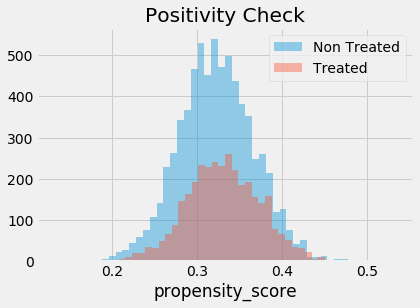

In [12]:
sns.distplot(data_ps.query("intervention==0")["propensity_score"], kde=False, label="Non Treated")
sns.distplot(data_ps.query("intervention==1")["propensity_score"], kde=False, label="Treated")
plt.title("Positivity Check")
plt.legend();

Cuối cùng, chúng ta sử dụng mô hình ước lượng điểm xu hướng theo trọng số để thu được ước lượng tác động can thiệp trung bình.

In [13]:
weight = ((data_ps["intervention"]-data_ps["propensity_score"]) /
          (data_ps["propensity_score"]*(1-data_ps["propensity_score"])))

y1 = sum(data_ps.query("intervention==1")["achievement_score"]*weight_t) / len(data)
y0 = sum(data_ps.query("intervention==0")["achievement_score"]*weight_nt) / len(data)

ate = np.mean(weight * data_ps["achievement_score"])

print("Y1:", y1)
print("Y0:", y0)
print("ATE", np.mean(weight * data_ps["achievement_score"]))

Y1: 0.2595494385591457
Y0: -0.12891583769626005
ATE 0.3884652762554067


Điểm xu hướng theo trọng số nói rằng chúng ta nên kỳ vọng các cá nhân được can thiệp thành công ở mức 0.38 lần độ lệch chuẩn cao hơn so với các cá nhân đối chứng. Chúng ta cũng có thể thấy rằng nếu không có ai nhận can thiệp, chúng ta nên kỳ vọng mức độ thành công chung sẽ thấp hơn 0,12 độ lệch chuẩn so với hiện tại. Bằng lập luận tương tự, chúng ta nên kỳ vọng mức độ thành công chung sẽ cao hơn 0,25 độ lệch chuẩn nếu chúng ta tổ chức hội thảo cho tất cả mọi người. Đối chiếu điều này với ước lượng ATE 0,47 mà chúng ta có được nếu chỉ so sánh đơn giản giữa nhóm can thiệp và nhóm đối chứng. Đây là bằng chứng cho thấy thiên lệch mà chúng ta có thực sự mang giá trị dương và việc kiểm soát X cho chúng ta một ước lượng khiêm tốn hơn về tác động của tư duy phát triển.

## Sai Số Chuẩn

![img](./data/img/ps/bootstrap.png)

Để tính toán sai số chuẩn cho mô hình ước lượng IPTW, chúng ta có thể sử dụng công thức phương sai của bình quân gia quyền.

$
\sigma^2_w = \dfrac{\sum_{i=1}^{n}w_i(y_i-\hat{\mu})^2}{\sum_{i=1}^{n}w_i}
$

Tuy nhiên, chúng ta chỉ có thể sử dụng công thức này nếu chúng ta có điểm xu hướng thực. Nếu chúng ta đang sử dụng phiên bản ước lượng của nó, \\(\hat{P}(x)\\), chúng ta cần tính đến các lỗi trong quá trình ước lượng. Cách dễ nhất để làm điều này là bootstrap toàn bộ quy trình. Điều này đạt được bằng cách lấy mẫu có thay thế từ dữ liệu gốc và tính toán ATE như chúng tôi đã làm ở trên. Sau đó, chúng tôi lặp lại điều này nhiều lần để có được phân phối của ước lượng ATE.

In [ ]:
from joblib import Parallel, delayed # for parallel processing

# define function that computes the IPTW estimator
def run_ps(df, X, T, y):
    # estimate the propensity score
    ps = LogisticRegression(C=1e6).fit(df[X], df[T]).predict_proba(df[X])[:, 1]
    
    weight = (df[T]-ps) / (ps*(1-ps)) # define the weights
    return np.mean(weight * df[y]) # compute the ATE

np.random.seed(88)
# run 1000 bootstrap samples
bootstrap_sample = 1000
ates = Parallel(n_jobs=4)(delayed(run_ps)(data_with_categ.sample(frac=1, replace=True), X, T, Y)
                          for _ in range(bootstrap_sample))
ates = np.array(ates)

ATE là giá trị trung bình của các mẫu bootstrap và sai số chuẩn là độ lệch chuẩn của những mẫu này.

In [ ]:
print(f"ATE 95% CI: {ates.mean()} +- {1.96*ates.std()}")

Chúng ta có thể mô phỏng các mẫu bootstrap trông như thế nào cùng với các khoảng tin cậy.

In [ ]:
sns.distplot(ates, kde=False)
plt.vlines(ates.mean()-1.96*ates.std(), 0, 20, linestyles="dotted")
plt.vlines(ates.mean()+1.96*ates.std(), 0, 20, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.legend();

## Các vấn đề phổ biến của Điểm Xu Hướng

Với vai trò là một chuyên gia dữ liệu, tôi hiểu rất khó cưỡng lại mong muốn tận dụng sử dụng sức mạnh của bộ công cụ học máy để ước lượng điểm xu hướng chính xác nhất có thể. Bạn có thể nhanh chóng bị choáng ngợp bởi tất cả các phép tối ưu hoá AUC, kiểm chứng chéo, và điều chỉnh siêu tham số Bayes. Chúng tôi không nói rằng bạn không nên làm điều đó. Trên thực tế, tất cả lý thuyết về điểm xu hướng và học máy đều mới xuất hiện, vì vậy có rất nhiều điều chúng ta chưa biết. Nhưng rất đáng để tìm hiểu một phần nào đó trước.

Điều đầu tiên là chất lượng dự báo của điểm xu hướng không chuyển thành các đặc tính cân bằng của nó. Xuất phát từ lĩnh vực học máy, một trong những mặt thách thức nhất khi làm quen với suy luận nhân quả là việc coi mọi thứ như một bài toán dự báo. Trên thực tế, việc tối đa hóa sức mạnh dự báo của điểm xu hướng thậm chí có thể làm ảnh hưởng đến mục đích suy luận nhân quả. **Điểm xu hướng không cần thiết phải dự báo can thiệp tốt. Nó chỉ cần bao gồm tất cả các biến nhiễu**. Nếu chúng ta đưa vào các biến rất tốt cho việc dự báo can thiệp nhưng không liên quan đến kết quả, nó thực sự sẽ làm tăng phương sai của mô hình ước lượng điểm xu hướng. Điều này tương tự như vấn đề hồi quy tuyến tính gặp phải khi chúng ta đưa vào các biến tương quan với can thiệp nhưng không liên quan đến kết quả.

![img](./data/img/ps/ml-trap.png)

Để thấy điều này, hãy xem xét ví dụ sau (phỏng theo Sách của Hernán). Bạn có 2 trường học, một trong số đó áp dụng hội thảo về tư duy cầu tiến cho 99% sinh viên và trường còn lại áp dụng cho 1%. Giả sử rằng các trường không có tác động đến tác động can thiệp (trừ việc thông qua can thiệp), vì vậy không cần thiết phải kiểm soát nó. Nếu bạn thêm biến trường học vào mô hình điểm xu hướng, nó sẽ có khả năng dự báo rất cao. Tuy nhiên, một cách tình cờ, chúng ta có thể kết thúc với một mẫu mà tất cả mọi người trong trường A đều được can thiệp, dẫn đến điểm xu hướng là 1 cho trường đó, và điều này sẽ dẫn đến một phương sai vô hạn. Đây là một ví dụ cực đoan, nhưng hãy xem nó sẽ hoạt động như thế nào với dữ liệu mô phỏng.

In [ ]:
np.random.seed(42)
school_a = pd.DataFrame(dict(T=np.random.binomial(1, .99, 400), school=0, intercept=1))
school_b = pd.DataFrame(dict(T=np.random.binomial(1, .01, 400), school=1, intercept=1))
ex_data = pd.concat([school_a, school_b]).assign(y = lambda d: np.random.normal(1 + 0.1 * d["T"]))
ex_data.head()

Sau khi mô phỏng dữ liệu này, chúng ta chạy bootstrap với thuật toán Điểm Xu Hướng hai lần. Lần thứ nhất bao gồm trường học như một thuộc tính của mô hình điểm xu hướng. Lần thứ hai, chúng ta không cho trường học vào mô hình.

In [ ]:
ate_w_f = np.array([run_ps(ex_data.sample(frac=1, replace=True), ["school"], "T", "y") for _ in range(500)])
ate_wo_f = np.array([run_ps(ex_data.sample(frac=1, replace=True), ["intercept"], "T", "y") for _ in range(500)])

In [ ]:
sns.distplot(ate_w_f, kde=False, label="PS W School")
sns.distplot(ate_wo_f, kde=False, label="PS W/O School")
plt.legend();

Như bạn có thể thấy, mô hình ước lượng điểm xu hướng bổ sung thuộc tính trường học có phương sai rất lớn, trong khi mô hình không có nó hoạt động tốt hơn nhiều. Ngoài ra, vì trường học không phải là biến nhiễu, nên mô hình không có nó cũng không chệch.

Như đã nói, dự báo can thiệp đơn thuần không phải là vấn đề cần tập trung. Chúng ta thực sự cần xây dựng dự báo theo cách kiểm soát nhiễu, không phải theo cách dự báo can thiệp. Điều này dẫn đến một vấn đề khác thường gặp trong các phương pháp điểm xu hướng. Trong ví dụ về tư duy của chúng ta, dữ liệu hóa ra rất cân bằng. Nhưng không phải dữ liệu nào cũng như vậy. Trong một số tình huống, nhóm can thiệp có xác suất can thiệp cao hơn nhiều so với nhóm đối chứng và phân phối điểm xu hướng không chồng lấn nhiều.

In [ ]:
sns.distplot(np.random.beta(4,1,500), kde=False, label="Non Treated")
sns.distplot(np.random.beta(1,3,500), kde=False, label="Treated")
plt.title("Positivity Check")
plt.legend();

Nếu điều này xảy ra, nó có nghĩa là điều kiện dương không mạnh lắm. Nếu một đối tượng được can thiệp có điểm xu hướng, chẳng hạn, 0,9 và điểm xu hướng tối đa của nhóm đối chứng là 0,7, chúng ta sẽ không có bất kỳ một đối chứng nào để so sánh với cá nhân có điểm xu hướng 0,9. Sự thiếu cân bằng này có thể tạo ra một số thiên lệch, bởi vì chúng ta sẽ phải ngoại suy tác động can thiệp cho các vùng chưa biết. Không chỉ vậy, các đối tượng có điểm xu hướng rất cao hoặc rất thấp có trọng số rất cao, làm tăng phương sai. Theo luật kinh nghiệm, bạn sẽ gặp rắc rối nếu bất kỳ trọng số nào lớn hơn 20 (điều này xảy ra với một đối tượng không được can thiệp có điểm xu hướng bằng 0,95 hoặc một đối tượng được can thiệp với điểm xu hướng bằng 0,05).

Một giải pháp thay thế là cắt giảm trọng số để có giá trị tối đa là 20. Điều này sẽ làm giảm phương sai, nhưng nó thực sự sẽ tạo ra nhiều thiên lệch hơn. Thành thật mà nói, mặc dù đây là một cách làm phổ biến để giảm phương sai, chúng tôi không thực sự ưa thích nó. Bạn sẽ không bao giờ biết liệu thiên lệch mà bạn gây ra bằng việc cắt giảm có quá nhiều hay không. Ngoài ra, nếu các phân phối không chồng lấn, dữ liệu của bạn có thể không đủ để đưa ra kết luận nhân quả. Để có thêm một số cách nhìn trực quan về điều này, chúng ta có thể xem xét một kỹ thuật kết hợp điểm xu hướng và ghép cặp. 

## Ghép Cặp Điểm Xu Hướng

Như đã nói, bạn không cần phải kiểm soát X khi bạn có điểm xu hướng. Kiểm soát điểm xu hướng là đủ. Do đó, bạn có thể coi điểm xu hướng như thực hiện thao tác giảm chiều dữ liệu trên không gian thuộc tính. Nó gộp tất cả các thuộc tính trong X thành một chiều chỉ định can thiệp. Vì lý do này, chúng ta có thể coi điểm xu hướng là một thuộc tính đầu vào cho các mô hình khác. Lấy một mô hình hồi quy làm ví dụ.

In [ ]:
smf.ols("achievement_score ~ intervention + propensity_score", data=data_ps).fit().summary().tables[1]

Nếu chúng ta kiểm soát điểm xu hướng, chúng ta ước lượng được ATE bằng 0,39 thấp hơn 0,47 chúng ta thu được trước đó với mô hình hồi quy không kiểm soát điểm xu hướng. Chúng ta cũng có thể sử dụng ghép cặp trên điểm xu hướng. Lần này, thay vì cố gắng tìm các cặp tương tự về tất cả các đặc điểm X, chúng ta có thể tìm các cặp chỉ có cùng điểm xu hướng.

Đây quả là một cải tiến lớn so với mô hình ước lượng ghép cặp, vì nó giải quyết được lời nguyền đa chiều. Ngoài ra, nếu một thuộc tính không quan trọng đối với chỉ định can thiệp, thì mô hình điểm xu hướng sẽ xác định và đưa ra mức độ quan trọng thấp cho nó khi khớp với cơ chế can thiệp. Mặt khác, ghép cặp trên các thuộc tính vẫn sẽ cố gắng tìm các cặp mà các cá nhân giống nhau về các thuộc tính không quan trọng này.

In [ ]:
from causalinference import CausalModel

cm = CausalModel(
    Y=data_ps["achievement_score"].values, 
    D=data_ps["intervention"].values, 
    X=data_ps[["propensity_score"]].values
)

cm.est_via_matching(matches=1, bias_adj=True)

print(cm.estimates)

Như chúng ta thấy, chúng ta cũng thu được ATE bằng 0,38, điều này đồng nhất với những gì chúng ta đã thấy trước đó với điểm xu hướng theo trọng số. Ghép cặp trên điểm xu hướng cũng cung cấp cho chúng ta một cách nhìn trực quan về lý do tại sao có sự chồng lấn nhỏ trong điểm xu hướng giữa nhóm can thiệp và nhóm đối chứng là nguy hiểm. Nếu điều này xảy ra, ghép cặp  dựa trên sự khác biệt điểm xu hướng sẽ lớn, dẫn đến thiên lệch.

Một lưu ý cuối cùng ở đây là các sai số chuẩn trên là sai, vì chúng không giải thích cho sự không chắc chắn trong việc ước lượng điểm xu hướng. Đáng tiếc rằng [bootstrap không hoạt động với ghép cặp] (https://economics.mit.edu/files/11862). Ngoài ra, lý thuyết trên còn rất mới nên các phương pháp điểm xu hướng với sai số chuẩn chưa được thực hiện trên Python. Vì lý do này, chúng tôi không thấy nhiều ghép cặp điểm xu hướng trong Python.

## Ý tưởng chính

Ở đây, chúng ta đã biết rằng xác suất nhận can thiệp được gọi là điểm xu hướng và chúng ta có thể sử dụng điểm này làm điểm cân bằng. Điều này có nghĩa là, nếu chúng ta có điểm xu hướng, chúng ta không cần phải kiểm soát trực tiếp các biến nhiễu. Việc kiểm soát điểm xu hướng là đủ để xác định tác động nhân quả. Chúng ta đã thấy cách điểm xu hướng hoạt động như giảm chiều dữ liệu trong không gian biến nhiễu.

Những dự đoán này cho phép chúng ta rút ra một mô hình ước lượng trọng số cho suy luận nhân quả. Không chỉ vậy, chúng ta đã thấy cách điểm xu hướng có thể được sử dụng cùng với các phương pháp khác để kiểm soát thiên lệch nhiễu.

Cuối cùng, chúng ta đã xem xét một số vấn đề ngoại suy mà chúng ta có thể gặp phải nếu chúng ta không thể có sự chồng lấn tốt giữa phân phối điểm xu hướng được can thiệp và đối chứng. 

## Tài liệu tham khảo
Tôi muốn dành loạt bài viết này như lời cảm ơn tới Joshua Angrist, Alberto Abadie và Christopher Walters bởi lớp học Kinh tế lượng tuyệt vời của họ. Hầu hết những ý tưởng trong chương này được đúc kết từ những bài giảng của họ tại Hiệp hội kinh tế Hoa Kỳ. Lắng nghe các bài giảng của họ giúp tôi có thêm động lực đi qua một năm 2020 đầy khó khăn này.

* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

Tôi cũng trích dẫn một cuốn sách tuyệt vời từ Angrist. Họ đã thành công trong việc chỉ cho tôi thấy rằng Kinh tế lượng, hoặc là Lượng theo cách gọi của họ, không chỉ cực kỳ hữu ích mà còn vô cùng thú vị. 

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

Cuối cùng, không thể không nhắc đến cuốn sách được viết bởi Miguel Hernan và Jamie Robins. Nó là người bạn đồng hành đáng tin cậy giúp tôi tìm lời giải đáp cho những câu hỏi hóc búa nhất về tính nhân quả. 

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

# Bảng Từ Viết tắt 
|Viết tắt| Tiếng Anh | Tiếng Việt |
| --- | --- | --- | 
|ATE|Average Treatment Effect|Tác động Can thiệp Trung bình| 
|AUC|Area Under the Curve|Diện tích Dưới Đường cong (ROC)| 
|CDF|Cumulative Distribution Function|Hàm Phân phối Tích lũy| 
|IPTW|Inverse Probability of Treatment Weighting|Trọng số theo Nghịch đảo của Xác suất Can thiệp| 


# Bảng Thuật ngữ 
| Thuật ngữ | Tiếng Anh |
| --- | --- | 
|biến giả|dummy, dummy variable| 
|biến nhiễu|confounder, confounding variable| 
|biến phân loại|categorical variable| 
|biến đại diện|proxy, surrogate variable| 
|bootstrap|bootstrap| 
|bình quân gia quyền|weighted average| 
|bộ dữ liệu mô phỏng|simulated dataset| 
|chuyên gia dữ liệu|data scientist| 
|chệch|biased| 
|chỉ định can thiệp|treatment assignment| 
|cố định|condition on| 
|dữ liệu|data| 
|dữ liệu mô phỏng|simulated data| 
|ghép cặp|matching| 
|ghép cặp điểm xu hướng|propensity score matching| 
|giá trị kỳ vọng|expected value| 
|giá trị trung bình|mean| 
|giả thiết điều kiện dương|positivity assumption| 
|giảm chiều dữ liệu|dimensionality reduction| 
|gradient boosting|gradient boosting| 
|học máy|machine learning| 
|hồi quy|regression, regress| 
|hồi quy lô-gít|logistic regression| 
|hồi quy tuyến tính|linear regression| 
|khoảng tin cậy|confidence interval| 
|kiểm chứng chéo|cross validation| 
|kích thước mẫu|sample size| 
|kết quả|outcome| 
|kết quả tiềm năng|potential outcome| 
|luật kỳ vọng lặp|law of iterated expectation| 
|lời nguyền đa chiều|curse of dimensionality| 
|mô hình ước lượng|estimator| 
|mô hình ước lượng điểm xu hướng theo trọng số|propensity score weighting estimator| 
|mẫu bootstrap|bootstrap sample| 
|nghịch đảo của xác suất can thiệp|inverse probability of treatment| 
|ngoại suy|extrapolation, extrapolate| 
|nhiễu|confounding| 
|nhóm can thiệp|treated group| 
|nhóm được can thiệp|treatment group, test group| 
|nhóm đối chứng|control group, untreated group| 
|phân phối|distribution| 
|phân phối chuẩn|normal distribution| 
|phương sai|variance| 
|quá khớp|overfitting| 
|sai số chuẩn|standard error| 
|suy luận nhân quả|causal inference, causal reasoning| 
|thiên lệch|bias| 
|thuật toán|algorithm| 
|thuộc tính|feature| 
|thống kê|statistics| 
|tác động can thiệp|treatment effect, treatment impact| 
|tác động can thiệp trung bình|average treatment effect| 
|tối ưu hoá|optimisation| 
|tổng thể|population| 
|xác suất có điều kiện|conditional probability| 
|điều chỉnh siêu tham số|hyper paremeter tuning| 
|điểm cân bằng|balancing score| 
|điểm xu hướng|propensity score| 
|điểm xu hướng theo trọng số|propensity score weighting| 
|điểm xu hướng theo trọng số |propensity weighting| 
|được can thiệp|treated| 
|đối chứng|untreated, non-treated| 
|độ lệch chuẩn|standard deviation| 
|độc lập có điều kiện|conditionally independent, conditional independence| 
